In [1]:
import SimpleITK as sitk
from viz import *
from clinical_evaluation.registration import pipeline
from clinical_evaluation.utils import preprocess, ops
from clinical_evaluation.evaluation import metrics
from pathlib import Path

In [2]:
pipeline = pipeline.RegistrationPipeline()

In [3]:
# Load CT
CT = pipeline.load("../projects/example/sample_data/MR_CT/p004/CT/p004_ct.nii")


In [4]:
CT_mask = pipeline.get_body_mask(CT)
CT = ops.apply_mask(CT, CT_mask)

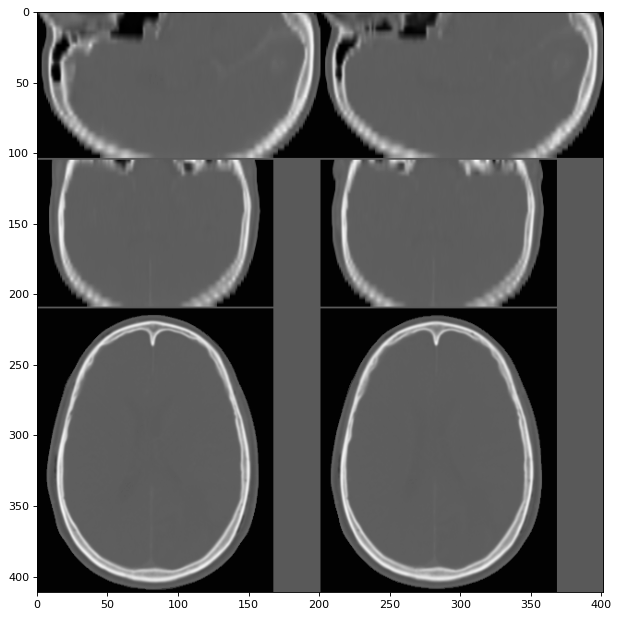

In [5]:
# Shows mid slices isotropically
show_mid_slices(CT)

In [6]:
MR = pipeline.load("../projects/example/sample_data/MR_CT/p004/MR/p004_t1.nii")


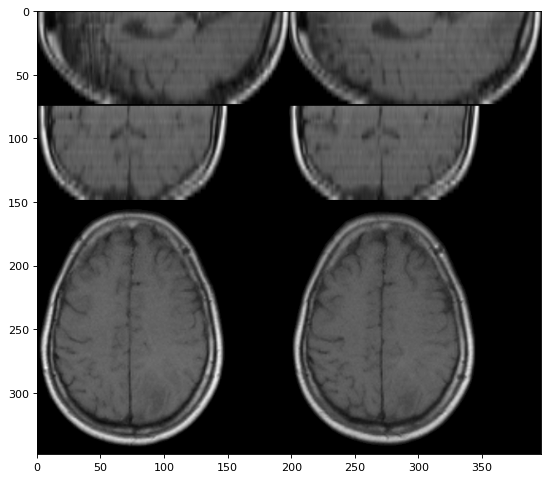

In [7]:
show_mid_slices(MR)

### ITKv4 Rigid Registration Process


In [8]:
# Perform rigid registration
params = "Rigid"

deformed_CT, transform = pipeline.deform(CT, MR, params, mode='ITKv4')


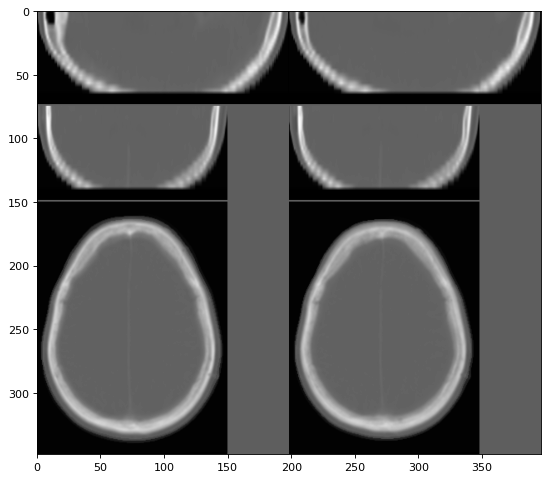

In [9]:
show_mid_slices(deformed_CT)

In [10]:
visualizer = regviz.RegistrationVisualizer(outdir='.', save_mode='image')
visualizer.save_registration_visualizations(MR, deformed_CT)

In [11]:
# Save CBCT, CT and deformed CT
sitk.WriteImage(MR, "target.nrrd", True)
sitk.WriteImage(CT, "source.nrrd", True)
sitk.WriteImage(deformed_CT, "deformed.nrrd", True)